In [1]:
import tensorflow as tf
from TPM_from_VCS.data import toy_data_generator
from TPM_from_VCS.models.etp import etp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def get_diagram(cost_history, steps):
    plt.plot(np.arange(steps), cost_history)
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('Training Error')
    plt.show()

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

##########################
### WRAPPER FUNCTIONS
##########################

def fully_connected(input_tensor, output_nodes,
                    activation=None, seed=None,
                    name='fully_connected'):

    with tf.name_scope(name):
        input_nodes = input_tensor.get_shape().as_list()[1]
        weights = tf.Variable(tf.truncated_normal(shape=(input_nodes,
                                                         output_nodes),
                                                  mean=0.0,
                                                  stddev=0.1,
                                                  dtype=tf.float32,
                                                  seed=seed),
                              name='weights')
        biases = tf.Variable(tf.zeros(shape=[output_nodes]), name='biases')

        act = tf.matmul(input_tensor, weights) + biases
        if activation is not None:
            act = activation(act)
        return act


##########################
### DATASET
##########################

mnist = input_data.read_data_sets("./", validation_size=0)


##########################
### SETTINGS
##########################


# Hyperparameters
learning_rate = 0.01
training_epochs = 600
batch_size = 128

# Architecture
hidden_size = 2
input_size = 5
# image_width = 28
MAX_VC_DIM = 10
MAX_NODES = 1000

# Other
print_interval = 20
random_seed = 123


##########################
### GRAPH DEFINITION
##########################

g = tf.Graph()
with g.as_default():
    
    tf.set_random_seed(random_seed)
    
#     cost_history = []

    # Input data
    input_layer = tf.placeholder(tf.float32, [None, input_size],
                                 name='input')

    ###########
    # Encoder
    ###########
    
    inp = tf.stack(input_layer, axis=0)
    
    hidden_layer_1 = fully_connected(input_layer, hidden_size * 30, 
                                   activation=None, 
                                   name='hidden0')
    
    hidden_layer0 = fully_connected(hidden_layer_1, hidden_size * 15, 
                                   activation=None, 
                                   name='hidden0')
    
    hidden_layer1 = fully_connected(hidden_layer0, hidden_size * 5, 
                                   activation=None, 
                                   name='hidden1')
    
    hidden_layer2 = fully_connected(hidden_layer1, hidden_size, 
                                   activation=None, 
                                   name='hidden2')
    
#     temp_out = tf.stack(hidden_layer2, name='temp_out', axis=0)
#     temp = tf.identity(temp_out, name='reduced_dim')
    
    
    
#     etp_loss = etp.get_best_etp(temp, inp)
#     loss = tf.identity(etp_loss, 'etp')
    
    
    hidden_layer3 = fully_connected(hidden_layer2, hidden_size * 5, 
                                   activation=None, 
                                   name='hidden3')
    
    hidden_layer4 = fully_connected(hidden_layer3, hidden_size * 15, 
                                   activation=None, 
                                   name='hidden4')
    
    hidden_layer5 = fully_connected(hidden_layer4, hidden_size * 30, 
                                   activation=None, 
                                   name='hidden4')
    
    
    
    ###########
    # Decoder
    ###########
    
    logits = fully_connected(hidden_layer5, input_size, 
                             activation=None, name='logits')
    # note MNIST pixels are normalized to 0-1 range
#     out_layer = tf.nn.sigmoid(logits, name='decoding') 
    
    # set the output layer to be the same as logits. TODO: try relu activation also. Change the cost funcion definition only
    out_layer = tf.nn.relu(logits, name='decoding') 
    
    ##################
    # Loss & Optimizer
    ##################
    
    cost = tf.reduce_mean(tf.losses.mean_squared_error(
        labels=input_layer, predictions=logits), name='cost')
    
#     cost_history.append(cost)
    
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(cost, name='train')

    # Saver to save session for reuse
    saver = tf.train.Saver()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
batch_x = toy_data_generator.create_dataset(1)

batch_x[0][0]

len(batch_x)

61

Minibatch: 001 | Cost:    95087.602
Minibatch: 021 | Cost:    64076.617
Minibatch: 041 | Cost:    66508.945
Minibatch: 061 | Cost:    818691.125
Minibatch: 081 | Cost:    68706.023
Minibatch: 101 | Cost:    87015.039
Minibatch: 121 | Cost:    126647.477
Minibatch: 141 | Cost:    221891.781
Minibatch: 161 | Cost:    66157.297
Minibatch: 181 | Cost:    68792.125
Minibatch: 201 | Cost:    64885.199
Minibatch: 221 | Cost:    71751.375
Minibatch: 241 | Cost:    72749.523
Minibatch: 261 | Cost:    65004.219
Minibatch: 281 | Cost:    57585.648
Minibatch: 301 | Cost:    51908.777
Minibatch: 321 | Cost:    61296.426
Minibatch: 341 | Cost:    65323.000
Minibatch: 361 | Cost:    51535.672
Minibatch: 381 | Cost:    50974.273
Minibatch: 401 | Cost:    50062.961
Minibatch: 421 | Cost:    53645.137
Minibatch: 441 | Cost:    75789.922
Minibatch: 461 | Cost:    79391.578
Minibatch: 481 | Cost:    79405.891
Epoch:     001 | AvgCost: 4993887.455
Minibatch: 001 | Cost:    43308.043
Minibatch: 021 | Cost: 

Minibatch: 441 | Cost:    208600.844
Minibatch: 461 | Cost:    193028.594
Minibatch: 481 | Cost:    158207.484
Epoch:     009 | AvgCost: 2321325.053
Minibatch: 001 | Cost:    62221.664
Minibatch: 021 | Cost:    32719.807
Minibatch: 041 | Cost:    31622.891
Minibatch: 061 | Cost:    39006.633
Minibatch: 081 | Cost:    28973.438
Minibatch: 101 | Cost:    28806.859
Minibatch: 121 | Cost:    40005.609
Minibatch: 141 | Cost:    26984.109
Minibatch: 161 | Cost:    27714.037
Minibatch: 181 | Cost:    26650.141
Minibatch: 201 | Cost:    29783.016
Minibatch: 221 | Cost:    248369.703
Minibatch: 241 | Cost:    3751.975
Minibatch: 261 | Cost:    752.622
Minibatch: 281 | Cost:    1340.404
Minibatch: 301 | Cost:    3273.323
Minibatch: 321 | Cost:    14259.550
Minibatch: 341 | Cost:    28746.684
Minibatch: 361 | Cost:    22950.832
Minibatch: 381 | Cost:    27933.965
Minibatch: 401 | Cost:    30852.840
Minibatch: 421 | Cost:    31918.109
Minibatch: 441 | Cost:    6304.451
Minibatch: 461 | Cost:    10

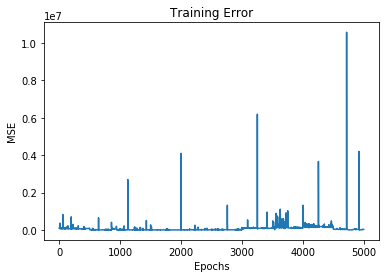

Epoch:     010 | AvgCost: 2610210.356
Minibatch: 001 | Cost:    24999.793
Minibatch: 021 | Cost:    6616.255
Minibatch: 041 | Cost:    7675.303
Minibatch: 061 | Cost:    1164.116
Minibatch: 081 | Cost:    46929.707
Minibatch: 101 | Cost:    32536.150
Minibatch: 121 | Cost:    16055.639
Minibatch: 141 | Cost:    3348.786
Minibatch: 161 | Cost:    1162.898
Minibatch: 181 | Cost:    8632.514
Minibatch: 201 | Cost:    3248.483
Minibatch: 221 | Cost:    2596.531
Minibatch: 241 | Cost:    2934.356
Minibatch: 261 | Cost:    10182.914
Minibatch: 281 | Cost:    3570.126
Minibatch: 301 | Cost:    3179.241
Minibatch: 321 | Cost:    22908.516
Minibatch: 341 | Cost:    2781.245
Minibatch: 361 | Cost:    2258.852
Minibatch: 381 | Cost:    9145.357
Minibatch: 401 | Cost:    2929.434
Minibatch: 421 | Cost:    2802.961
Minibatch: 441 | Cost:    1985.916
Minibatch: 461 | Cost:    3613.336
Minibatch: 481 | Cost:    8318.248
Epoch:     011 | AvgCost: 24093728.855
Minibatch: 001 | Cost:    142987.719
Minib

Minibatch: 401 | Cost:    14032.617
Minibatch: 421 | Cost:    11579.286
Minibatch: 441 | Cost:    20960.443
Minibatch: 461 | Cost:    19482.770
Minibatch: 481 | Cost:    19572.094
Epoch:     019 | AvgCost: 4537385.735
Minibatch: 001 | Cost:    109147.414
Minibatch: 021 | Cost:    18286.104
Minibatch: 041 | Cost:    16583.781
Minibatch: 061 | Cost:    14728.903
Minibatch: 081 | Cost:    90155.633
Minibatch: 101 | Cost:    11346.859
Minibatch: 121 | Cost:    8845.113
Minibatch: 141 | Cost:    12755.099
Minibatch: 161 | Cost:    13437.479
Minibatch: 181 | Cost:    13929.075
Minibatch: 201 | Cost:    15471.372
Minibatch: 221 | Cost:    14843.114
Minibatch: 241 | Cost:    12683.300
Minibatch: 261 | Cost:    14764.708
Minibatch: 281 | Cost:    13747.998
Minibatch: 301 | Cost:    41992.422
Minibatch: 321 | Cost:    12654.063
Minibatch: 341 | Cost:    13907.487
Minibatch: 361 | Cost:    13319.841
Minibatch: 381 | Cost:    13368.766
Minibatch: 401 | Cost:    16383.019
Minibatch: 421 | Cost:    

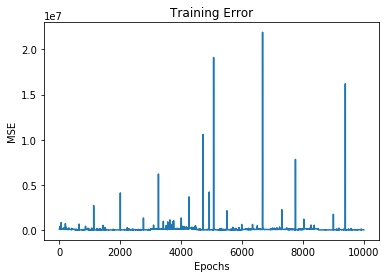

Epoch:     020 | AvgCost: 1043313.543
Minibatch: 001 | Cost:    130397.539
Minibatch: 021 | Cost:    26482.150
Minibatch: 041 | Cost:    838.753
Minibatch: 061 | Cost:    851.900
Minibatch: 081 | Cost:    1544.537
Minibatch: 101 | Cost:    1317.110
Minibatch: 121 | Cost:    1116.102
Minibatch: 141 | Cost:    3214.731
Minibatch: 161 | Cost:    951.580
Minibatch: 181 | Cost:    2037.634
Minibatch: 201 | Cost:    5067.444
Minibatch: 221 | Cost:    2784.257
Minibatch: 241 | Cost:    2820.262
Minibatch: 261 | Cost:    4201.970
Minibatch: 281 | Cost:    7899.517
Minibatch: 301 | Cost:    9851.236
Minibatch: 321 | Cost:    9447.238
Minibatch: 341 | Cost:    16005.162
Minibatch: 361 | Cost:    3289.839
Minibatch: 381 | Cost:    5803.679
Minibatch: 401 | Cost:    4632.991
Minibatch: 421 | Cost:    11123.099
Minibatch: 441 | Cost:    17969.160
Minibatch: 461 | Cost:    6850.227
Minibatch: 481 | Cost:    8287.347
Epoch:     021 | AvgCost: 1078957.536
Minibatch: 001 | Cost:    73233.062
Minibatch:

Minibatch: 381 | Cost:    97589.281
Minibatch: 401 | Cost:    67928.695
Minibatch: 421 | Cost:    330668.312
Minibatch: 441 | Cost:    87292.711
Minibatch: 461 | Cost:    77270.023
Minibatch: 481 | Cost:    55326.523
Epoch:     029 | AvgCost: 5389360.501
Minibatch: 001 | Cost:    72097.852
Minibatch: 021 | Cost:    15803.122
Minibatch: 041 | Cost:    12423.208
Minibatch: 061 | Cost:    11528.347
Minibatch: 081 | Cost:    13670.942
Minibatch: 101 | Cost:    14514.664
Minibatch: 121 | Cost:    13530.326
Minibatch: 141 | Cost:    64600.762
Minibatch: 161 | Cost:    19626.402
Minibatch: 181 | Cost:    9966.064
Minibatch: 201 | Cost:    11347.967
Minibatch: 221 | Cost:    6746.089
Minibatch: 241 | Cost:    6594.186
Minibatch: 261 | Cost:    7241.792
Minibatch: 281 | Cost:    7728.453
Minibatch: 301 | Cost:    14924.239
Minibatch: 321 | Cost:    8385.756
Minibatch: 341 | Cost:    8710.896
Minibatch: 361 | Cost:    9704.068
Minibatch: 381 | Cost:    9636.874
Minibatch: 401 | Cost:    10804.24

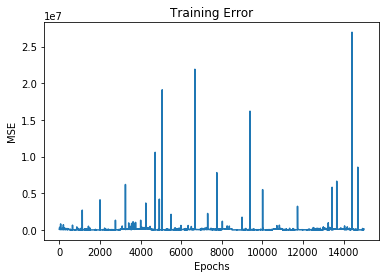

Epoch:     030 | AvgCost: 4128140.279
Minibatch: 001 | Cost:    227099.844
Minibatch: 021 | Cost:    22642.949
Minibatch: 041 | Cost:    25862.510
Minibatch: 061 | Cost:    23438.816
Minibatch: 081 | Cost:    25301.891
Minibatch: 101 | Cost:    21504.936
Minibatch: 121 | Cost:    21876.428
Minibatch: 141 | Cost:    22394.279
Minibatch: 161 | Cost:    21891.082
Minibatch: 181 | Cost:    24322.254
Minibatch: 201 | Cost:    31519.135
Minibatch: 221 | Cost:    25160.906
Minibatch: 241 | Cost:    23340.326
Minibatch: 261 | Cost:    29150.943
Minibatch: 281 | Cost:    20598.043
Minibatch: 301 | Cost:    50863.816
Minibatch: 321 | Cost:    22399.238
Minibatch: 341 | Cost:    22720.533
Minibatch: 361 | Cost:    105911.984
Minibatch: 381 | Cost:    3172.271
Minibatch: 401 | Cost:    17682.676
Minibatch: 421 | Cost:    23093.398
Minibatch: 441 | Cost:    22036.779
Minibatch: 461 | Cost:    22474.082
Minibatch: 481 | Cost:    22910.857
Epoch:     031 | AvgCost: 6697028.937
Minibatch: 001 | Cost: 

Minibatch: 381 | Cost:    12809.996
Minibatch: 401 | Cost:    15738.755
Minibatch: 421 | Cost:    15912.586
Minibatch: 441 | Cost:    8374.368
Minibatch: 461 | Cost:    20477.086
Minibatch: 481 | Cost:    5003.686
Epoch:     039 | AvgCost: 7779306.130
Minibatch: 001 | Cost:    69974.031
Minibatch: 021 | Cost:    13219.214
Minibatch: 041 | Cost:    13686.150
Minibatch: 061 | Cost:    9449.585
Minibatch: 081 | Cost:    5370.287
Minibatch: 101 | Cost:    4386.460
Minibatch: 121 | Cost:    5980.417
Minibatch: 141 | Cost:    7656.880
Minibatch: 161 | Cost:    28051.572
Minibatch: 181 | Cost:    4251.143
Minibatch: 201 | Cost:    1981.491
Minibatch: 221 | Cost:    414034.719
Minibatch: 241 | Cost:    5750.400
Minibatch: 261 | Cost:    5747.487
Minibatch: 281 | Cost:    3766.550
Minibatch: 301 | Cost:    3049.857
Minibatch: 321 | Cost:    91957.109
Minibatch: 341 | Cost:    2112.545
Minibatch: 361 | Cost:    12075.943
Minibatch: 381 | Cost:    2012.574
Minibatch: 401 | Cost:    2905.930
Minib

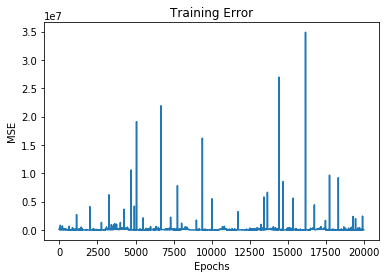

Epoch:     040 | AvgCost: 2549742.461
Minibatch: 001 | Cost:    46020.164
Minibatch: 021 | Cost:    66180.141
Minibatch: 041 | Cost:    64363.988
Minibatch: 061 | Cost:    64730.199
Minibatch: 081 | Cost:    61795.957
Minibatch: 101 | Cost:    66133.266
Minibatch: 121 | Cost:    65054.051
Minibatch: 141 | Cost:    64060.574
Minibatch: 161 | Cost:    63126.750
Minibatch: 181 | Cost:    65192.508
Minibatch: 201 | Cost:    63007.863
Minibatch: 221 | Cost:    400015.969
Minibatch: 241 | Cost:    92429.664
Minibatch: 261 | Cost:    66915.711
Minibatch: 281 | Cost:    105208.625
Minibatch: 301 | Cost:    66467.625
Minibatch: 321 | Cost:    59120.113
Minibatch: 341 | Cost:    62979.332
Minibatch: 361 | Cost:    63575.199
Minibatch: 381 | Cost:    63764.414
Minibatch: 401 | Cost:    57492.750
Minibatch: 421 | Cost:    62321.680
Minibatch: 441 | Cost:    62824.617
Minibatch: 461 | Cost:    64615.336
Minibatch: 481 | Cost:    63582.523
Epoch:     041 | AvgCost: 7059356.941
Minibatch: 001 | Cost:

Minibatch: 361 | Cost:    151176.891
Minibatch: 381 | Cost:    152345.219
Minibatch: 401 | Cost:    193220.484
Minibatch: 421 | Cost:    177726.734
Minibatch: 441 | Cost:    165685.766
Minibatch: 461 | Cost:    157818.906
Minibatch: 481 | Cost:    154547.891
Epoch:     049 | AvgCost: 1974610.005
Minibatch: 001 | Cost:    10206.865
Minibatch: 021 | Cost:    32025.355
Minibatch: 041 | Cost:    31822.359
Minibatch: 061 | Cost:    34794.219
Minibatch: 081 | Cost:    43090.871
Minibatch: 101 | Cost:    31894.963
Minibatch: 121 | Cost:    63700.039
Minibatch: 141 | Cost:    32322.088
Minibatch: 161 | Cost:    32056.590
Minibatch: 181 | Cost:    30468.828
Minibatch: 201 | Cost:    51273.113
Minibatch: 221 | Cost:    39951.895
Minibatch: 241 | Cost:    30122.137
Minibatch: 261 | Cost:    29750.490
Minibatch: 281 | Cost:    30205.975
Minibatch: 301 | Cost:    79873.461
Minibatch: 321 | Cost:    63934.918
Minibatch: 341 | Cost:    42286.941
Minibatch: 361 | Cost:    34597.930
Minibatch: 381 | Co

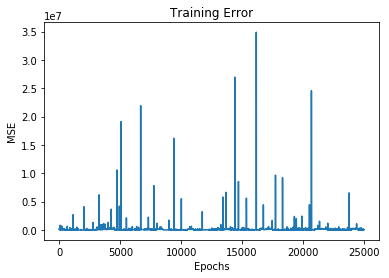

Epoch:     050 | AvgCost: 3836466.137
Minibatch: 001 | Cost:    201181.469
Minibatch: 021 | Cost:    25972.363
Minibatch: 041 | Cost:    11725.819
Minibatch: 061 | Cost:    11709.005
Minibatch: 081 | Cost:    80298.930
Minibatch: 101 | Cost:    13737.606
Minibatch: 121 | Cost:    16748.508
Minibatch: 141 | Cost:    20191.000
Minibatch: 161 | Cost:    14759.498
Minibatch: 181 | Cost:    12736.001
Minibatch: 201 | Cost:    12345.418
Minibatch: 221 | Cost:    17035.902
Minibatch: 241 | Cost:    12496.372
Minibatch: 261 | Cost:    10846.304
Minibatch: 281 | Cost:    18165.559
Minibatch: 301 | Cost:    16325.841
Minibatch: 321 | Cost:    11862.816
Minibatch: 341 | Cost:    43622.742
Minibatch: 361 | Cost:    111137.836
Minibatch: 381 | Cost:    11525.562
Minibatch: 401 | Cost:    12328.240
Minibatch: 421 | Cost:    12728.297
Minibatch: 441 | Cost:    12158.094
Minibatch: 461 | Cost:    12292.005
Minibatch: 481 | Cost:    12305.653
Epoch:     051 | AvgCost: 4601421.151
Minibatch: 001 | Cost:

Minibatch: 381 | Cost:    69588.750
Minibatch: 401 | Cost:    68012.641
Minibatch: 421 | Cost:    55940.188
Minibatch: 441 | Cost:    70076.641
Minibatch: 461 | Cost:    67629.109
Minibatch: 481 | Cost:    68212.602
Epoch:     059 | AvgCost: 5623269.800
Minibatch: 001 | Cost:    38022.508
Minibatch: 021 | Cost:    17953.324
Minibatch: 041 | Cost:    13554.317
Minibatch: 061 | Cost:    129244.062
Minibatch: 081 | Cost:    11495.470
Minibatch: 101 | Cost:    12457.919
Minibatch: 121 | Cost:    58153.176
Minibatch: 141 | Cost:    12178.514
Minibatch: 161 | Cost:    15670.969
Minibatch: 181 | Cost:    14398.570
Minibatch: 201 | Cost:    16566.322
Minibatch: 221 | Cost:    32285.469
Minibatch: 241 | Cost:    11478.678
Minibatch: 261 | Cost:    16659.584
Minibatch: 281 | Cost:    12543.626
Minibatch: 301 | Cost:    13066.834
Minibatch: 321 | Cost:    19260.105
Minibatch: 341 | Cost:    15125.497
Minibatch: 361 | Cost:    12102.010
Minibatch: 381 | Cost:    17542.512
Minibatch: 401 | Cost:   

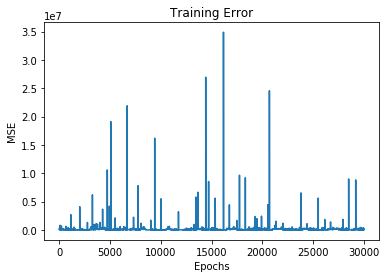

Epoch:     060 | AvgCost: 4841094.269
Minibatch: 001 | Cost:    258316.531
Minibatch: 021 | Cost:    42399.363
Minibatch: 041 | Cost:    13435.447
Minibatch: 061 | Cost:    12309.716
Minibatch: 081 | Cost:    13748.506
Minibatch: 101 | Cost:    12713.033
Minibatch: 121 | Cost:    12628.481
Minibatch: 141 | Cost:    12706.342
Minibatch: 161 | Cost:    12248.973
Minibatch: 181 | Cost:    12152.244
Minibatch: 201 | Cost:    12369.697
Minibatch: 221 | Cost:    15472.492
Minibatch: 241 | Cost:    13358.252
Minibatch: 261 | Cost:    54078.918
Minibatch: 281 | Cost:    404750.031
Minibatch: 301 | Cost:    230283.453
Minibatch: 321 | Cost:    209742.297
Minibatch: 341 | Cost:    203005.922
Minibatch: 361 | Cost:    201122.625
Minibatch: 381 | Cost:    200998.594
Minibatch: 401 | Cost:    201385.875
Minibatch: 421 | Cost:    201755.047
Minibatch: 441 | Cost:    201878.031
Minibatch: 461 | Cost:    201661.844
Minibatch: 481 | Cost:    201060.531
Epoch:     061 | AvgCost: 1002624911.165
Minibatch

Minibatch: 401 | Cost:    75906.672
Minibatch: 421 | Cost:    70415.578
Minibatch: 441 | Cost:    70574.234
Minibatch: 461 | Cost:    69736.953
Minibatch: 481 | Cost:    68892.797
Epoch:     069 | AvgCost: 1477649.238
Minibatch: 001 | Cost:    64755.082
Minibatch: 021 | Cost:    5480.966
Minibatch: 041 | Cost:    1516.271
Minibatch: 061 | Cost:    706.155
Minibatch: 081 | Cost:    2378.342
Minibatch: 101 | Cost:    1159.345
Minibatch: 121 | Cost:    1605.484
Minibatch: 141 | Cost:    1653.464
Minibatch: 161 | Cost:    1272.052
Minibatch: 181 | Cost:    3261.520
Minibatch: 201 | Cost:    1991.203
Minibatch: 221 | Cost:    39802.980
Minibatch: 241 | Cost:    976.811
Minibatch: 261 | Cost:    1990.797
Minibatch: 281 | Cost:    2009.389
Minibatch: 301 | Cost:    4555.099
Minibatch: 321 | Cost:    1169.002
Minibatch: 341 | Cost:    1280.880
Minibatch: 361 | Cost:    1834.101
Minibatch: 381 | Cost:    2012.072
Minibatch: 401 | Cost:    1630.139
Minibatch: 421 | Cost:    1884.060
Minibatch: 4

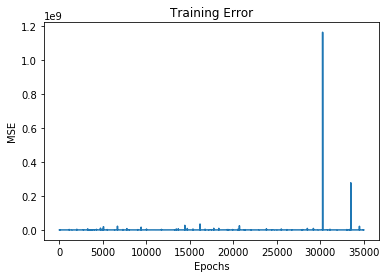

Epoch:     070 | AvgCost: 3623029.174
Minibatch: 001 | Cost:    185551.906
Minibatch: 021 | Cost:    67882.711
Minibatch: 041 | Cost:    426.753
Minibatch: 061 | Cost:    357.446
Minibatch: 081 | Cost:    2790.492
Minibatch: 101 | Cost:    1637.423
Minibatch: 121 | Cost:    706.792
Minibatch: 141 | Cost:    793.910
Minibatch: 161 | Cost:    2638.292
Minibatch: 181 | Cost:    372.363
Minibatch: 201 | Cost:    83791.922
Minibatch: 221 | Cost:    88153.672
Minibatch: 241 | Cost:    528.132
Minibatch: 261 | Cost:    69655.734
Minibatch: 281 | Cost:    83841.500
Minibatch: 301 | Cost:    92662.469
Minibatch: 321 | Cost:    92259.734
Minibatch: 341 | Cost:    92435.703
Minibatch: 361 | Cost:    912.874
Minibatch: 381 | Cost:    253.273
Minibatch: 401 | Cost:    579.436
Minibatch: 421 | Cost:    260.596
Minibatch: 441 | Cost:    2160.221
Minibatch: 461 | Cost:    267.074
Minibatch: 481 | Cost:    234.776
Epoch:     071 | AvgCost: 2901810.797
Minibatch: 001 | Cost:    325072.656
Minibatch: 021

Minibatch: 361 | Cost:    7951.780
Minibatch: 381 | Cost:    10402.123
Minibatch: 401 | Cost:    9104.447
Minibatch: 421 | Cost:    7343.794
Minibatch: 441 | Cost:    7653.702
Minibatch: 461 | Cost:    10117.839
Minibatch: 481 | Cost:    7520.855
Epoch:     079 | AvgCost: 996109.840
Minibatch: 001 | Cost:    28742.941
Minibatch: 021 | Cost:    7894.681
Minibatch: 041 | Cost:    7506.740
Minibatch: 061 | Cost:    9996.503
Minibatch: 081 | Cost:    5818.836
Minibatch: 101 | Cost:    10449.089
Minibatch: 121 | Cost:    8657.495
Minibatch: 141 | Cost:    12279.235
Minibatch: 161 | Cost:    10487.491
Minibatch: 181 | Cost:    8951.426
Minibatch: 201 | Cost:    8582.096
Minibatch: 221 | Cost:    10102.966
Minibatch: 241 | Cost:    23475.096
Minibatch: 261 | Cost:    9930.183
Minibatch: 281 | Cost:    11505.703
Minibatch: 301 | Cost:    10287.005
Minibatch: 321 | Cost:    10970.285
Minibatch: 341 | Cost:    12272.182
Minibatch: 361 | Cost:    10173.201
Minibatch: 381 | Cost:    8503.758
Minib

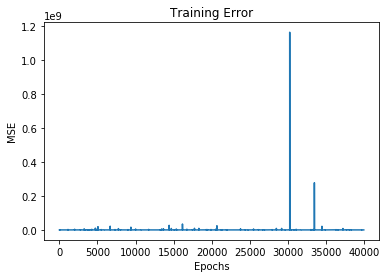

Epoch:     080 | AvgCost: 8178082.967
Minibatch: 001 | Cost:    98109.945
Minibatch: 021 | Cost:    228693.672
Minibatch: 041 | Cost:    147240.297
Minibatch: 061 | Cost:    128268.148
Minibatch: 081 | Cost:    175959.594
Minibatch: 101 | Cost:    7735.470
Minibatch: 121 | Cost:    5546.866
Minibatch: 141 | Cost:    5678.506
Minibatch: 161 | Cost:    3939.217
Minibatch: 181 | Cost:    5281.116
Minibatch: 201 | Cost:    12305.532
Minibatch: 221 | Cost:    5120.728
Minibatch: 241 | Cost:    8045.008
Minibatch: 261 | Cost:    17850.412
Minibatch: 281 | Cost:    6022.023
Minibatch: 301 | Cost:    4350.035
Minibatch: 321 | Cost:    8399.804
Minibatch: 341 | Cost:    4025.432
Minibatch: 361 | Cost:    15165.195
Minibatch: 381 | Cost:    3743.616
Minibatch: 401 | Cost:    3816.012
Minibatch: 421 | Cost:    3926.556
Minibatch: 441 | Cost:    4006.204
Minibatch: 461 | Cost:    3698.031
Minibatch: 481 | Cost:    3749.014
Epoch:     081 | AvgCost: 394848.288
Minibatch: 001 | Cost:    399710.188
M

Minibatch: 401 | Cost:    21148.471
Minibatch: 421 | Cost:    19102.961
Minibatch: 441 | Cost:    18855.715
Minibatch: 461 | Cost:    21043.541
Minibatch: 481 | Cost:    21865.742
Epoch:     089 | AvgCost: 6282324.207
Minibatch: 001 | Cost:    9901.826
Minibatch: 021 | Cost:    21103.352
Minibatch: 041 | Cost:    11183.588
Minibatch: 061 | Cost:    10121.796
Minibatch: 081 | Cost:    9754.799
Minibatch: 101 | Cost:    15584.854
Minibatch: 121 | Cost:    11516.636
Minibatch: 141 | Cost:    32350.668
Minibatch: 161 | Cost:    11530.289
Minibatch: 181 | Cost:    14484.269
Minibatch: 201 | Cost:    14617.477
Minibatch: 221 | Cost:    12897.768
Minibatch: 241 | Cost:    14142.083
Minibatch: 261 | Cost:    9634.434
Minibatch: 281 | Cost:    10184.084
Minibatch: 301 | Cost:    9768.158
Minibatch: 321 | Cost:    8624.330
Minibatch: 341 | Cost:    8517.221
Minibatch: 361 | Cost:    10187.363
Minibatch: 381 | Cost:    9039.688
Minibatch: 401 | Cost:    18518.270
Minibatch: 421 | Cost:    9716.40

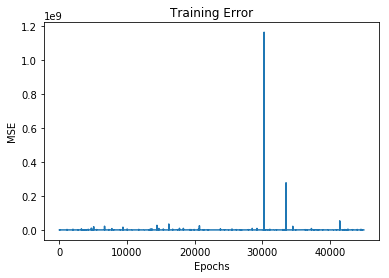

Epoch:     090 | AvgCost: 2187843.525
Minibatch: 001 | Cost:    12871.586
Minibatch: 021 | Cost:    10713.326
Minibatch: 041 | Cost:    11363.949
Minibatch: 061 | Cost:    11904.747
Minibatch: 081 | Cost:    10858.982
Minibatch: 101 | Cost:    15010.900
Minibatch: 121 | Cost:    10188.651
Minibatch: 141 | Cost:    7315.813
Minibatch: 161 | Cost:    16615.521
Minibatch: 181 | Cost:    14578.175
Minibatch: 201 | Cost:    13775.229
Minibatch: 221 | Cost:    16418.793
Minibatch: 241 | Cost:    13650.778
Minibatch: 261 | Cost:    15194.325
Minibatch: 281 | Cost:    16655.809
Minibatch: 301 | Cost:    18586.512
Minibatch: 321 | Cost:    17034.686
Minibatch: 341 | Cost:    15129.797
Minibatch: 361 | Cost:    11205.802
Minibatch: 381 | Cost:    16674.930
Minibatch: 401 | Cost:    12799.580
Minibatch: 421 | Cost:    131094.172
Minibatch: 441 | Cost:    14826.880
Minibatch: 461 | Cost:    13476.255
Minibatch: 481 | Cost:    14651.451
Epoch:     091 | AvgCost: 2562349.425
Minibatch: 001 | Cost:  

Minibatch: 361 | Cost:    23868.328
Minibatch: 381 | Cost:    23812.154
Minibatch: 401 | Cost:    60737.367
Minibatch: 421 | Cost:    24217.953
Minibatch: 441 | Cost:    28878.355
Minibatch: 461 | Cost:    23785.594
Minibatch: 481 | Cost:    43968.977
Epoch:     099 | AvgCost: 2569620.671
Minibatch: 001 | Cost:    35161.008
Minibatch: 021 | Cost:    24857.385
Minibatch: 041 | Cost:    28251.270
Minibatch: 061 | Cost:    47602.180
Minibatch: 081 | Cost:    35502.477
Minibatch: 101 | Cost:    1099.366
Minibatch: 121 | Cost:    101.401
Minibatch: 141 | Cost:    1296.371
Minibatch: 161 | Cost:    5068.946
Minibatch: 181 | Cost:    9312.296
Minibatch: 201 | Cost:    42772.094
Minibatch: 221 | Cost:    24750.996
Minibatch: 241 | Cost:    15979.494
Minibatch: 261 | Cost:    3107.727
Minibatch: 281 | Cost:    3114.241
Minibatch: 301 | Cost:    552.168
Minibatch: 321 | Cost:    3137.615
Minibatch: 341 | Cost:    43200.465
Minibatch: 361 | Cost:    4927.237
Minibatch: 381 | Cost:    10653.921
Mi

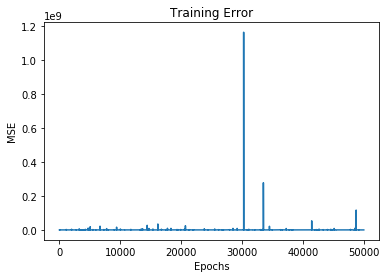

Epoch:     100 | AvgCost: 5602230.403
Minibatch: 001 | Cost:    29033.604
Minibatch: 021 | Cost:    13838.805
Minibatch: 041 | Cost:    15646.159
Minibatch: 061 | Cost:    14306.878
Minibatch: 081 | Cost:    13393.716
Minibatch: 101 | Cost:    13128.880
Minibatch: 121 | Cost:    22013.057
Minibatch: 141 | Cost:    16497.818
Minibatch: 161 | Cost:    30025.355
Minibatch: 181 | Cost:    14669.200
Minibatch: 201 | Cost:    17121.023
Minibatch: 221 | Cost:    13049.854
Minibatch: 241 | Cost:    12842.305
Minibatch: 261 | Cost:    13472.356
Minibatch: 281 | Cost:    17646.934
Minibatch: 301 | Cost:    14357.947
Minibatch: 321 | Cost:    14276.200
Minibatch: 341 | Cost:    17629.309
Minibatch: 361 | Cost:    13289.940
Minibatch: 381 | Cost:    16118.771
Minibatch: 401 | Cost:    15230.323
Minibatch: 421 | Cost:    14998.498
Minibatch: 441 | Cost:    14830.547
Minibatch: 461 | Cost:    14402.498
Minibatch: 481 | Cost:    18722.752
Epoch:     101 | AvgCost: 6136996.187
Minibatch: 001 | Cost:  

Minibatch: 361 | Cost:    114284.688
Minibatch: 381 | Cost:    104954.289
Minibatch: 401 | Cost:    101883.984
Minibatch: 421 | Cost:    135933.094
Minibatch: 441 | Cost:    104380.023
Minibatch: 461 | Cost:    104881.664
Minibatch: 481 | Cost:    103765.328
Epoch:     109 | AvgCost: 5101068.754
Minibatch: 001 | Cost:    102506.922
Minibatch: 021 | Cost:    79812.016
Minibatch: 041 | Cost:    135706.922
Minibatch: 061 | Cost:    58930.945
Minibatch: 081 | Cost:    58465.762
Minibatch: 101 | Cost:    57593.762
Minibatch: 121 | Cost:    64237.500
Minibatch: 141 | Cost:    57273.605
Minibatch: 161 | Cost:    57880.957
Minibatch: 181 | Cost:    57885.480
Minibatch: 201 | Cost:    227826.781
Minibatch: 221 | Cost:    72908.664
Minibatch: 241 | Cost:    64013.164
Minibatch: 261 | Cost:    62772.832
Minibatch: 281 | Cost:    62113.000
Minibatch: 301 | Cost:    63525.094
Minibatch: 321 | Cost:    65994.414
Minibatch: 341 | Cost:    68263.852
Minibatch: 361 | Cost:    68490.898
Minibatch: 381 |

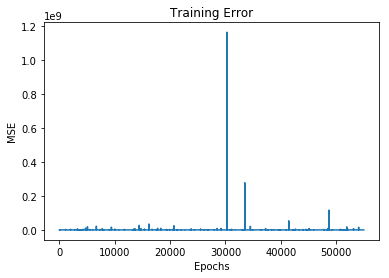

Epoch:     110 | AvgCost: 2124338.460
Minibatch: 001 | Cost:    100205.547
Minibatch: 021 | Cost:    30021.818
Minibatch: 041 | Cost:    39671.711
Minibatch: 061 | Cost:    26323.135
Minibatch: 081 | Cost:    29506.738
Minibatch: 101 | Cost:    25733.539
Minibatch: 121 | Cost:    26219.281
Minibatch: 141 | Cost:    32674.668
Minibatch: 161 | Cost:    46886.449
Minibatch: 181 | Cost:    22126.762
Minibatch: 201 | Cost:    21696.781
Minibatch: 221 | Cost:    21223.072
Minibatch: 241 | Cost:    21037.754
Minibatch: 261 | Cost:    21498.643
Minibatch: 281 | Cost:    22169.271
Minibatch: 301 | Cost:    22835.816
Minibatch: 321 | Cost:    23848.953
Minibatch: 341 | Cost:    25891.191
Minibatch: 361 | Cost:    24468.018
Minibatch: 381 | Cost:    25172.457
Minibatch: 401 | Cost:    25842.551
Minibatch: 421 | Cost:    26318.871
Minibatch: 441 | Cost:    26901.906
Minibatch: 461 | Cost:    25584.393
Minibatch: 481 | Cost:    21213.324
Epoch:     111 | AvgCost: 5207234.444
Minibatch: 001 | Cost: 

Minibatch: 401 | Cost:    16773.676
Minibatch: 421 | Cost:    16631.996
Minibatch: 441 | Cost:    16360.299
Minibatch: 461 | Cost:    70025.805
Minibatch: 481 | Cost:    17402.363
Epoch:     119 | AvgCost: 6035748.392
Minibatch: 001 | Cost:    51766.617
Minibatch: 021 | Cost:    2751.946
Minibatch: 041 | Cost:    4797.476
Minibatch: 061 | Cost:    5910.853
Minibatch: 081 | Cost:    3694.093
Minibatch: 101 | Cost:    3331.468
Minibatch: 121 | Cost:    3953.373
Minibatch: 141 | Cost:    3333.405
Minibatch: 161 | Cost:    2868.792
Minibatch: 181 | Cost:    3455.885
Minibatch: 201 | Cost:    5349.963
Minibatch: 221 | Cost:    2864.479
Minibatch: 241 | Cost:    2936.385
Minibatch: 261 | Cost:    3250.291
Minibatch: 281 | Cost:    3021.670
Minibatch: 301 | Cost:    5333.135
Minibatch: 321 | Cost:    3109.716
Minibatch: 341 | Cost:    3167.497
Minibatch: 361 | Cost:    2867.478
Minibatch: 381 | Cost:    3158.418
Minibatch: 401 | Cost:    36360.680
Minibatch: 421 | Cost:    2887.439
Minibatch:

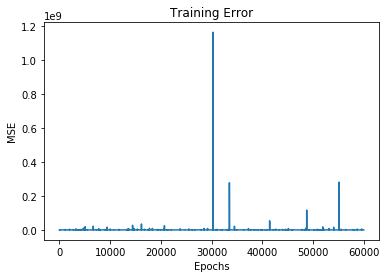

Epoch:     120 | AvgCost: 1870741.635
Minibatch: 001 | Cost:    28256.160
Minibatch: 021 | Cost:    15452.662
Minibatch: 041 | Cost:    31214.145
Minibatch: 061 | Cost:    14364.481
Minibatch: 081 | Cost:    15026.760
Minibatch: 101 | Cost:    16491.432
Minibatch: 121 | Cost:    14888.381
Minibatch: 141 | Cost:    11743.032
Minibatch: 161 | Cost:    11356.884
Minibatch: 181 | Cost:    9228.240
Minibatch: 201 | Cost:    10783.283
Minibatch: 221 | Cost:    17873.389
Minibatch: 241 | Cost:    11763.264
Minibatch: 261 | Cost:    12246.443
Minibatch: 281 | Cost:    11617.308
Minibatch: 301 | Cost:    11381.849
Minibatch: 321 | Cost:    13450.725
Minibatch: 341 | Cost:    22371.936
Minibatch: 361 | Cost:    13425.581
Minibatch: 381 | Cost:    15858.463
Minibatch: 401 | Cost:    13455.403
Minibatch: 421 | Cost:    13161.811
Minibatch: 441 | Cost:    20256.732
Minibatch: 461 | Cost:    13663.120
Minibatch: 481 | Cost:    15179.127
Epoch:     121 | AvgCost: 5469575.583
Minibatch: 001 | Cost:   

Minibatch: 361 | Cost:    30268.037
Minibatch: 381 | Cost:    27064.891
Minibatch: 401 | Cost:    28621.912
Minibatch: 421 | Cost:    27719.104
Minibatch: 441 | Cost:    27946.369
Minibatch: 461 | Cost:    28181.572
Minibatch: 481 | Cost:    29052.682
Epoch:     129 | AvgCost: 3702549.852
Minibatch: 001 | Cost:    141506.734
Minibatch: 021 | Cost:    39302.645
Minibatch: 041 | Cost:    40248.055
Minibatch: 061 | Cost:    41921.570
Minibatch: 081 | Cost:    40619.379
Minibatch: 101 | Cost:    42926.195
Minibatch: 121 | Cost:    43337.883
Minibatch: 141 | Cost:    45084.777
Minibatch: 161 | Cost:    49264.027
Minibatch: 181 | Cost:    54293.812
Minibatch: 201 | Cost:    56937.605
Minibatch: 221 | Cost:    48989.238
Minibatch: 241 | Cost:    50686.680
Minibatch: 261 | Cost:    41571.273
Minibatch: 281 | Cost:    52997.727
Minibatch: 301 | Cost:    42706.301
Minibatch: 321 | Cost:    41513.324
Minibatch: 341 | Cost:    42437.715
Minibatch: 361 | Cost:    33517.816
Minibatch: 381 | Cost:   

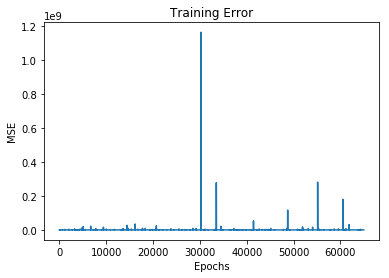

Epoch:     130 | AvgCost: 3976892.399
Minibatch: 001 | Cost:    33727.617
Minibatch: 021 | Cost:    10073.145
Minibatch: 041 | Cost:    13392.756
Minibatch: 061 | Cost:    32736.635
Minibatch: 081 | Cost:    11877.936
Minibatch: 101 | Cost:    13388.239
Minibatch: 121 | Cost:    10010.651
Minibatch: 141 | Cost:    13065.899
Minibatch: 161 | Cost:    14529.127
Minibatch: 181 | Cost:    11524.193
Minibatch: 201 | Cost:    9578.641
Minibatch: 221 | Cost:    47921.242
Minibatch: 241 | Cost:    10180.353
Minibatch: 261 | Cost:    10548.513
Minibatch: 281 | Cost:    10207.568
Minibatch: 301 | Cost:    9502.124
Minibatch: 321 | Cost:    16406.479
Minibatch: 341 | Cost:    44610.508
Minibatch: 361 | Cost:    9128.226
Minibatch: 381 | Cost:    9850.182
Minibatch: 401 | Cost:    27191.199
Minibatch: 421 | Cost:    22981.281
Minibatch: 441 | Cost:    8844.000
Minibatch: 461 | Cost:    38686.242
Minibatch: 481 | Cost:    32034.297
Epoch:     131 | AvgCost: 5230728.966
Minibatch: 001 | Cost:    167

Minibatch: 341 | Cost:    137961.875
Minibatch: 361 | Cost:    138704.344
Minibatch: 381 | Cost:    134728.031
Minibatch: 401 | Cost:    136680.094
Minibatch: 421 | Cost:    135610.750
Minibatch: 441 | Cost:    134049.156
Minibatch: 461 | Cost:    135747.047
Minibatch: 481 | Cost:    158251.328
Epoch:     139 | AvgCost: 2548195.804
Minibatch: 001 | Cost:    104910.039
Minibatch: 021 | Cost:    43795.820
Minibatch: 041 | Cost:    42750.402
Minibatch: 061 | Cost:    44136.773
Minibatch: 081 | Cost:    43723.914
Minibatch: 101 | Cost:    46830.930
Minibatch: 121 | Cost:    47629.465
Minibatch: 141 | Cost:    45641.031
Minibatch: 161 | Cost:    46541.719
Minibatch: 181 | Cost:    50659.195
Minibatch: 201 | Cost:    61582.430
Minibatch: 221 | Cost:    45369.477
Minibatch: 241 | Cost:    46451.945
Minibatch: 261 | Cost:    45213.660
Minibatch: 281 | Cost:    45354.227
Minibatch: 301 | Cost:    44700.355
Minibatch: 321 | Cost:    44271.023
Minibatch: 341 | Cost:    46141.949
Minibatch: 361 | 

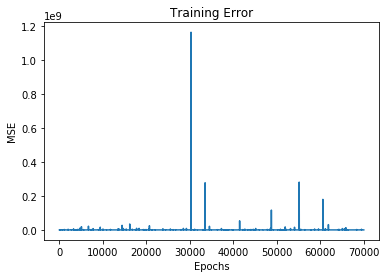

Epoch:     140 | AvgCost: 2334112.272
Minibatch: 001 | Cost:    39700.969
Minibatch: 021 | Cost:    1055.582
Minibatch: 041 | Cost:    128445.664
Minibatch: 061 | Cost:    527.339
Minibatch: 081 | Cost:    12371.186
Minibatch: 101 | Cost:    3775.462
Minibatch: 121 | Cost:    44963.770
Minibatch: 141 | Cost:    158.715
Minibatch: 161 | Cost:    372.622
Minibatch: 181 | Cost:    495.394
Minibatch: 201 | Cost:    890.905
Minibatch: 221 | Cost:    704.797
Minibatch: 241 | Cost:    828.009
Minibatch: 261 | Cost:    957.130
Minibatch: 281 | Cost:    503.496
Minibatch: 301 | Cost:    630.065
Minibatch: 321 | Cost:    635.430
Minibatch: 341 | Cost:    26007.754
Minibatch: 361 | Cost:    55990.168
Minibatch: 381 | Cost:    594.449
Minibatch: 401 | Cost:    2324.268
Minibatch: 421 | Cost:    6431.355
Minibatch: 441 | Cost:    1021.339
Minibatch: 461 | Cost:    907.137
Minibatch: 481 | Cost:    1199.678
Epoch:     141 | AvgCost: 2295800.150
Minibatch: 001 | Cost:    54471.281
Minibatch: 021 | Co

Minibatch: 421 | Cost:    3857.074
Minibatch: 441 | Cost:    15574.409
Minibatch: 461 | Cost:    12145.762
Minibatch: 481 | Cost:    7299.492
Epoch:     149 | AvgCost: 1215140.568
Minibatch: 001 | Cost:    59811.125
Minibatch: 021 | Cost:    11122.393
Minibatch: 041 | Cost:    529.501
Minibatch: 061 | Cost:    1212.409
Minibatch: 081 | Cost:    3327.380
Minibatch: 101 | Cost:    6657.677
Minibatch: 121 | Cost:    4873.618
Minibatch: 141 | Cost:    62.383
Minibatch: 161 | Cost:    777.221
Minibatch: 181 | Cost:    92266.609
Minibatch: 201 | Cost:    49.127
Minibatch: 221 | Cost:    8029.561
Minibatch: 241 | Cost:    3852.427
Minibatch: 261 | Cost:    301.928
Minibatch: 281 | Cost:    3483.531
Minibatch: 301 | Cost:    49657.008
Minibatch: 321 | Cost:    28576.229
Minibatch: 341 | Cost:    16948.713
Minibatch: 361 | Cost:    9425.146
Minibatch: 381 | Cost:    4711.366
Minibatch: 401 | Cost:    2071.031
Minibatch: 421 | Cost:    813.164
Minibatch: 441 | Cost:    309.396
Minibatch: 461 | C

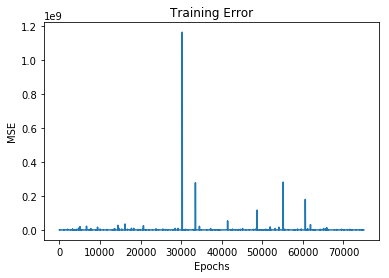

Epoch:     150 | AvgCost: 3508326.787
Minibatch: 001 | Cost:    7115.010
Minibatch: 021 | Cost:    866.240
Minibatch: 041 | Cost:    669.054
Minibatch: 061 | Cost:    325.885
Minibatch: 081 | Cost:    332.778
Minibatch: 101 | Cost:    430.560
Minibatch: 121 | Cost:    632.156
Minibatch: 141 | Cost:    395.190
Minibatch: 161 | Cost:    303.152
Minibatch: 181 | Cost:    1347.311
Minibatch: 201 | Cost:    743.526
Minibatch: 221 | Cost:    2416.329
Minibatch: 241 | Cost:    333.773
Minibatch: 261 | Cost:    2947.478
Minibatch: 281 | Cost:    1584.147
Minibatch: 301 | Cost:    293.208
Minibatch: 321 | Cost:    313.844
Minibatch: 341 | Cost:    310.269
Minibatch: 361 | Cost:    412.636
Minibatch: 381 | Cost:    904.064
Minibatch: 401 | Cost:    342.736
Minibatch: 421 | Cost:    688.196
Minibatch: 441 | Cost:    570.611
Minibatch: 461 | Cost:    696.400
Minibatch: 481 | Cost:    1809.161
Epoch:     151 | AvgCost: 2740086.894
Minibatch: 001 | Cost:    231798.203
Minibatch: 021 | Cost:    89350

Minibatch: 421 | Cost:    104043.109
Minibatch: 441 | Cost:    82328.859
Minibatch: 461 | Cost:    87155.359
Minibatch: 481 | Cost:    78743.008
Epoch:     159 | AvgCost: 4807032.991
Minibatch: 001 | Cost:    31902.525
Minibatch: 021 | Cost:    19911.020
Minibatch: 041 | Cost:    18828.455
Minibatch: 061 | Cost:    18991.254
Minibatch: 081 | Cost:    17916.066
Minibatch: 101 | Cost:    18594.996
Minibatch: 121 | Cost:    18703.920
Minibatch: 141 | Cost:    17972.654
Minibatch: 161 | Cost:    19046.107
Minibatch: 181 | Cost:    51347.148
Minibatch: 201 | Cost:    19259.947
Minibatch: 221 | Cost:    18701.891
Minibatch: 241 | Cost:    18920.941
Minibatch: 261 | Cost:    17913.625
Minibatch: 281 | Cost:    42875.008
Minibatch: 301 | Cost:    18746.570
Minibatch: 321 | Cost:    21981.352
Minibatch: 341 | Cost:    18505.184
Minibatch: 361 | Cost:    18453.025
Minibatch: 381 | Cost:    18223.795
Minibatch: 401 | Cost:    18215.316
Minibatch: 421 | Cost:    37309.312
Minibatch: 441 | Cost:   

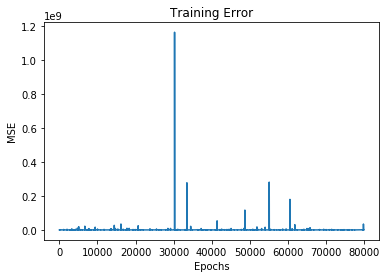

Epoch:     160 | AvgCost: 2846761.498
Minibatch: 001 | Cost:    6719.728
Minibatch: 021 | Cost:    26858.500
Minibatch: 041 | Cost:    25479.963
Minibatch: 061 | Cost:    23990.805
Minibatch: 081 | Cost:    26136.582
Minibatch: 101 | Cost:    31949.301
Minibatch: 121 | Cost:    25441.082
Minibatch: 141 | Cost:    27305.568
Minibatch: 161 | Cost:    25594.340
Minibatch: 181 | Cost:    26663.562
Minibatch: 201 | Cost:    27581.266
Minibatch: 221 | Cost:    25778.201
Minibatch: 241 | Cost:    28677.066
Minibatch: 261 | Cost:    26636.629
Minibatch: 281 | Cost:    27583.740
Minibatch: 301 | Cost:    28533.887
Minibatch: 321 | Cost:    24157.527
Minibatch: 341 | Cost:    34771.281
Minibatch: 361 | Cost:    26159.014
Minibatch: 381 | Cost:    26696.631
Minibatch: 401 | Cost:    25395.738
Minibatch: 421 | Cost:    26103.258
Minibatch: 441 | Cost:    25284.896
Minibatch: 461 | Cost:    25896.207
Minibatch: 481 | Cost:    24895.895
Epoch:     161 | AvgCost: 5495491.090
Minibatch: 001 | Cost:   

In [ ]:
import numpy as np

##########################
### TRAINING & EVALUATION
##########################
    
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    cost_history = []
    steps = 0
    
    np.random.seed(random_seed) # random seed for mnist iterator
    for epoch in range(training_epochs):
        avg_cost = 0.
#         total_batch = mnist.train.num_examples // batch_size
        total_batch = 500
        batch_x = toy_data_generator.create_dataset(1)
        
        for i in range(total_batch):
            
            
            for z in range(len(batch_x)):
                _, c = sess.run(['train', 'cost:0'], 
                                feed_dict={'input:0': np.reshape(batch_x[z][0], (-1, 5))})
                avg_cost += c
                
            cost_history.append(c)
            steps+=1
                
            
            if not i % print_interval:
                print("Minibatch: %03d | Cost:    %.3f" % (i + 1, c))
                
            if not steps % 5000:
                get_diagram(cost_history, steps)
                
    
        print("Epoch:     %03d | AvgCost: %.3f" % (epoch + 1, avg_cost / (i + 1)))
    
    saver.save(sess, save_path='./autoencoder.ckpt')

In [ ]:
get_diagram(cost_history, steps)

In [ ]:
a = toy_data_generator.create_dataset(1)
np.reshape(a[0][0], (-1, 5))

In [ ]:
# sess.run(['hidden2'])
ans = []
# saver.restore(sess, save_path='./autoencoder.ckpt')
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
#     saver.restore(sess, save_path='./autoencoder.ckpt')
    for i in range(len(a)):
        
        etp_loss = sess.run(['etp'], feed_dict={'input:0': np.reshape(a[i][0], (-1, 5))})
        
        print('{}'.format(etp_loss))
    

